In [1]:
#Please create a new folder named "all" to store all txt files of threads in the original folder.
from bs4 import BeautifulSoup, Tag
from collections import OrderedDict
from pathlib import Path
import os
import nltk
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from graph_constructor import get_graph, get_digraph, get_graph_from_list, get_chronological_clustering_coef, get_chronological_pgrank
# from key_student_extractor import get_key_student
from preprocess import preprocess_text
import networkx as nx
import util

#html-css-javascript LgWwihnoEeWDtQoum3sFeQ
#python_database eQJvsjn9EeWJaxK5AT4frw
#python_network Y4DUPDpQEeWO-Qq6rEZAow
#python 7A1yFTaREeWWBQrVFXqd1w
#hybrid-mobile-development -gcU5xn4EeWwrBKfKrqlSQ
#machine-learning Gtv4Xb1-EeS-ViIACwYKVQ
#learning-how-to-learn GdeNrll1EeSROyIACtiVvg
#angular-js 52blABnqEeW9dA4X94-nLQ
#server-side-development ngZrURn5EeWwrBKfKrqlSQ
#web-frameworks ycQnChn3EeWDtQoum3sFeQ

In [2]:
def is_word(string):
    for char in string:
        if not char.isalpha():
            return False
    return True

def tf_idf(docs, queries, tokenizer):
    """
    performs TF-IDF vectorization for documents and queries
    Parameters
        ----------
        docs : list
            list of documents
        queries : list
            list of queries
        tokenizer : custom tokenizer function
    Returns
    -------
    tfs : sparse array,
        tfidf vectors for documents. Each row corresponds to a document.
    tfs_query: sparse array,
        tfidf vectors for queries. Each row corresponds to a query.
    dictionary: list
        sorted dictionary
    """
    model = str.maketrans(dict.fromkeys(string.punctuation))
    processed_docs = [d.lower().translate(model) for d in docs]
    processed_queries = [d.lower().translate(model) for d in queries]
    tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenizer)
    tfs = tfidf.fit_transform(processed_docs)
    tfs_query = tfidf.transform(processed_queries)
    return tfs, tfs_query, tfidf

def tokenize_text(docs):
    """
    custom tokenization function given a list of documents
    Parameters
        ----------
        docs : string
            a document
    Returns
    -------
    stems : list
        list of tokens
    """

    text = ''
    for d in docs:
        text += '' + d
    stemmer = PorterStemmer()
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        if is_word(item):
            stems.append(stemmer.stem(item))
    return stems

def get_vectors(texts, queries):
    descriptions = []
    descriptions.append('')
    vec_docs, vec_queries, tfidf_model = tf_idf(texts, queries, tokenize_text)
    return vec_docs, vec_queries, tfidf_model

def graph_of_thread(thread_id):
    
    graph = nx.DiGraph()
    posts = thread_post_set_dic[thread_id]
    
    for each_post_id in posts:
        graph.add_edge(each_post_id, thread_id)
        comments = post_comment_set_dic[each_post_id]
        for each_comment_id in comments:
            graph.add_edge(each_comment_id, each_post_id)


    return graph

# Rubbish function
'''
def get_vectors_with_format_of_training_data(training_vectors, tfidf_training_model, testing_vectors, tfidf_testing_model):
    
    # word-index dictionaries
    training_term_index_dic = tfidf_training_model.vocabulary_
    testing_term_index_dic = tfidf_testing_model.vocabulary_
    
    # revert term dic
    training_index_term_dic = {}
    for term in training_term_index_dic:
        index = training_term_index_dic[term]
        training_index_term_dic[index] = term
        
    testing_index_term_dic = {}
    for term in testing_term_index_dic:
        index = testing_term_index_dic[term]
        testing_index_term_dic[index] = term
        
    training_vectors_as_list = training_vectors.tolist()
    combined_vector = training_vectors_as_list
    # iterate each word in the training vector. If we find the word in the testing dataset, assign the value. Otherwise
    # assign 0.
    for testing_vector in testing_vectors:
        current_vector_as_list = []
        for training_index in range (0, training_vectors.shape[1]):
            if training_index not in training_index_term_dic:
                print("Fatal error!!!")
            else:
                term = training_index_term_dic[training_index]
                
                if term in testing_term_index_dic:
                    testing_index = testing_term_index_dic[term]
                    current_value = testing_vector[testing_index]
                    current_vector_as_list.append(current_value)
                    
                else:
                    current_vector_as_list.append(0)

        combined_vector.append(current_vector_as_list)
        
    return np.asarray(combined_vector)
'''
    

'\ndef get_vectors_with_format_of_training_data(training_vectors, tfidf_training_model, testing_vectors, tfidf_testing_model):\n    \n    # word-index dictionaries\n    training_term_index_dic = tfidf_training_model.vocabulary_\n    testing_term_index_dic = tfidf_testing_model.vocabulary_\n    \n    # revert term dic\n    training_index_term_dic = {}\n    for term in training_term_index_dic:\n        index = training_term_index_dic[term]\n        training_index_term_dic[index] = term\n        \n    testing_index_term_dic = {}\n    for term in testing_term_index_dic:\n        index = testing_term_index_dic[term]\n        testing_index_term_dic[index] = term\n        \n    training_vectors_as_list = training_vectors.tolist()\n    combined_vector = training_vectors_as_list\n    # iterate each word in the training vector. If we find the word in the testing dataset, assign the value. Otherwise\n    # assign 0.\n    for testing_vector in testing_vectors:\n        current_vector_as_list = []\

In [3]:
# testing the new function 

text_a = 'I love my dog'
text_b = 'My dog is the best in the world'
text_c = 'I love my cat'
text_d = 'The world cup is dogs'

training_texts = []
testing_texts = []

training_texts.append(text_a)
training_texts.append(text_b)
testing_texts.append(text_c)
testing_texts.append(text_d)

training_vectors, testing_vectors, model = get_vectors(training_texts, testing_texts)

training_vectors = training_vectors.toarray()
testing_vectors = testing_vectors.toarray()

print(training_vectors)
print(model.vocabulary_)
print(testing_vectors)

[[ 0.          0.57973867  0.81480247  0.        ]
 [ 0.6316672   0.44943642  0.          0.6316672 ]]
{'love': 2, 'dog': 1, 'best': 0, 'world': 3}
[[ 0.          0.          1.          0.        ]
 [ 0.          0.57973867  0.          0.81480247]]


In [4]:
database = input("please input the database name: ")

user_table = {}

conn = util.create_connection(database)
with conn:
    cur = conn.cursor() 
    cur.execute("SELECT id, user_title FROM user")
    rows = cur.fetchall()
    for each_user in rows:
        user_id = each_user[0]
        user_title = each_user[1]
        user_table[user_id] = user_title



please input the database name: courseraData.db


In [ ]:
# list with the same data length

## texts
texts = []
training_texts = []
testing_texts = []

## ids
ids = []
training_ids = []
testing_ids = []

isreplied= []
id_to_index = {}

# for forum id alone
forum_id_list = []

# raw text dic
thread_text_dic = {}
post_text_dic = {}
comment_text_dic = {}

# container dic
forum_type_dic = {}
forum_graph_dic = {}
forum_digraph_dic = {}
thread_post_set_dic = {}
post_comment_set_dic = {}
thread_forum_dic = {}

# feature dic
num_of_post_dic = {}
num_of_comment_dic = {}
num_of_sen_dic = {}
num_of_comment_for_post_dic = {}
num_of_url_dic = {}
num_of_timeref_dic = {}
num_of_votes_dic = {}
is_replied = {}
starter_dic = {}

# truncation
thread_intervened_time_dic = {}
thread_posted_time_dic = {}

# problem thread
replied_thread_without_reply_time = []

In [ ]:
course_id = input("please input your course_id: ")

input_method = input("please press 'a' for manual, 'b' for semi-auto scan, others for auto: ")
if input_method == 'a':
    num_forum = input("please input the number of forums: ")
    print("please input the forum ids in chronological order")
    for i in range(0, int(num_forum)):
        new_forum_id = input("please input the current forum id: ")
        forum_id_list.append(new_forum_id)
        forum_type_dic[new_forum_id] = i
        forum_graph_dic[new_forum_id] = get_graph(new_forum_id, database)
        forum_digraph_dic[new_forum_id] = get_digraph(new_forum_id, database)

elif input_method == 'b':
    path = 'text/' + course_id + "/" + "forum.txt"
    file = open(path, "r")
    num_forum = int(file.readline())
    num_forum = input("please input the number of forums: ")
    for i in range (0, int(num_forum)):
        new_forum_id = file.readline()
        new_forum_id = new_forum_id.rstrip(os.linesep)
        forum_id_list.append(new_forum_id)
        forum_type_dic[new_forum_id] = i
        forum_graph_dic[new_forum_id] = get_graph(new_forum_id, database)
        forum_digraph_dic[new_forum_id] = get_digraph(new_forum_id, database)

else:
    path = 'text/' + course_id + "/" + "forum.txt"
    file = open(path, "r")
    num_forum = int(file.readline())
    for i in range (0, num_forum):
        new_forum_id = file.readline()
        new_forum_id = new_forum_id.rstrip(os.linesep)
        forum_id_list.append(new_forum_id)
        forum_type_dic[new_forum_id] = i
        forum_graph_dic[new_forum_id] = get_graph(new_forum_id, database)
        forum_digraph_dic[new_forum_id] = get_digraph(new_forum_id, database)

middleInd = int(input("please input the training set scale: "))

limit_message = "WHERE courseid = \'"
limit_message += course_id
limit_message += "\'"
if int(num_forum) >= 1:
    limit_message += " AND (forumid = \'"
    limit_message += forum_id_list[0]
    limit_message += "\'"

for i in range(1, int(num_forum)):
    limit_message += " OR forumid = \'"
    limit_message += forum_id_list[i]
    limit_message += "\'"

if int(num_forum) >= 1:
    limit_message += ")"
    
print("done preprocessing!")


please input your course_id: -gcU5xn4EeWwrBKfKrqlSQ


In [ ]:
# extract data from db.
ids = []
training_ids = []
testing_ids = []

conn = util.create_connection(database)
with conn:
    cur = conn.cursor()
    thread_message = 'SELECT id, title, inst_replied, starter, forumid, posted_time FROM thread '
    thread_message += limit_message
    thread_message += ' ORDER BY posted_time'
    print(thread_message)
    cur.execute(thread_message)
    threads = cur.fetchall()
    for each_thread in threads:
        
        # All the info from this select operation
        thread_id = each_thread[0]
        thread_title = each_thread[1]
        thread_intervention = each_thread[2]
        thread_starter = each_thread[3]
        thread_forum_id = each_thread[4]
        thread_time = each_thread[5]
        
        # Initialize intervention time as -1
        thread_intervened_time_dic[thread_id] = -1
        if(thread_starter in user_table and (user_table[thread_starter] == 'Instructor' or user_table[thread_starter] == 'Staff')):           
            continue

        # Detect the earliest intervention.
        if thread_intervention == 1:
            post_message = "SELECT user, post_time FROM post WHERE thread_id = \""
            post_message += thread_id
            post_message += "\" ORDER BY post_time"
            cur.execute(post_message)
            all_posts = cur.fetchall()
            for each_post in all_posts:
                poster = each_post[0]
                post_time = each_post[1]
                if poster in user_table and (user_table[poster] == 'Instructor' or user_table[poster] == 'Staff') and thread_intervened_time_dic[thread_id] == -1:
                    thread_intervened_time_dic[thread_id] = post_time

            comment_message = "SELECT user, post_time FROM comment WHERE thread_id = \""
            comment_message += thread_id
            comment_message += "\" ORDER BY post_time"
            cur.execute(comment_message)
            all_comments = cur.fetchall()
            for each_comment in all_comments:
                commenter = each_comment[0]
                comment_time = each_comment[1]
                if commenter in user_table and (user_table[commenter] == 'Instructor' or user_table[commenter] == 'Staff'):
                    if thread_intervened_time_dic[thread_id] == -1 or comment_time < thread_intervened_time_dic[thread_id]:

                        thread_intervened_time_dic[thread_id] = comment_time
                        
            if thread_intervened_time_dic[thread_id] == -1:
                replied_thread_without_reply_time.append(thread_id)
        
        # Memorize all the info in their respective dics
        ids.append(thread_id)
        thread_posted_time_dic[thread_id] = thread_time
        thread_forum_dic[thread_id] = thread_forum_id
        is_replied[thread_id] = thread_intervention
        thread_post_set_dic[thread_id] = []
        num_of_post_dic[thread_id] = 0
        num_of_comment_dic[thread_id] = 0
        num_of_votes_dic[thread_id] = 0
        starter_dic[thread_id] = thread_starter
        isreplied.append(thread_intervention)
        thread_text_dic[thread_id] = thread_title

    # extract all the posts
    post_message = 'SELECT id, thread_id, votes, user, post_text, post_time FROM post '
    post_message += limit_message
    post_message += ' ORDER BY post_time'
    cur.execute(post_message)
    rows = cur.fetchall()
    for each_post in rows:
        
        # All the info from this select operation
        post_id = each_post[0]
        post_thread_id = each_post[1]
        post_vote = each_post[2]
        poster = each_post[3]
        post_text = each_post[4]
        post_time = each_post[5]
        
        # If the home thread is intervened, continue.
        if post_thread_id in is_replied and is_replied[post_thread_id] and thread_intervened_time_dic[post_thread_id] != -1 and post_time >= thread_intervened_time_dic[post_thread_id]:
            continue
        
        # initialize all the features dic for posts
        post_comment_set_dic[post_id] = []
        num_of_comment_for_post_dic[post_id] = 0 
        post_text_dic[post_id] = post_text

        # if the thread is not initialized by the instructor, add thread level features
        if post_thread_id in num_of_votes_dic:
            num_of_votes_dic[post_thread_id] += post_vote
            thread_post_set_dic[post_thread_id].append(post_id)
            num_of_post_dic[post_thread_id] += 1


    comment_message = 'SELECT id, thread_id, post_id, user, comment_text, post_time FROM comment '
    comment_message += limit_message
    comment_message += ' ORDER BY post_time'

    cur.execute(comment_message)
    print(comment_message)
    rows = cur.fetchall()
    for each_comment in rows:
        
        # All the info from this select operation
        comment_id = each_comment[0]
        comment_thread_id = each_comment[1]
        comment_post_id = each_comment[2]
        commenter = each_comment[3]
        comment_text = each_comment[4]
        comment_time = each_comment[5]

        # if after intervention, truncate
        if comment_thread_id in is_replied and is_replied[comment_thread_id] and thread_intervened_time_dic[comment_thread_id] != -1 and comment_time >= thread_intervened_time_dic[comment_thread_id]:
            continue
 
        # features
        comment_text_dic[comment_id] = each_comment[4]

        if comment_thread_id in num_of_comment_dic:
            num_of_comment_dic[comment_thread_id] +=  1
            
        if comment_post_id in num_of_comment_for_post_dic:
            num_of_comment_for_post_dic[comment_post_id] += 1
            post_comment_set_dic[comment_post_id].append(comment_id)
            
print(len(ids))

In [81]:
# construct the id to index dictionary and split the training ids and testing ids
index = 0
training_ids = []
testing_ids = []

# ensure add from scratch
texts = []
training_texts = []
testing_texts = []

for oneid in ids:
    id_to_index[oneid] = index
    if forum_type_dic[thread_forum_dic[oneid]] <= middleInd:
        training_ids.append(oneid)
    else:
        testing_ids.append(oneid)

    index += 1

# process text
for oneid in ids:
    
    filename = 'text/' + course_id + "/" + str(oneid) + '.txt'
    f = open(filename, 'r', errors='ignore')
    content = f.read()

    num_url = content.count('a href')             
    num_timeref = content.count('<TIMEREF>')
    num_sen = content.count('.')
    num_of_url_dic[oneid] = num_url
    num_of_timeref_dic[oneid] = num_timeref
    num_of_sen_dic[oneid] = num_sen

    soup = BeautifulSoup(content, "lxml")

    for tag in soup.find_all('code'):
        tag.replaceWith('')

    for tag in soup.find_all('a'):
        tag.replaceWith('')

    content = soup.get_text()
    content = re.sub(r'^https?:\/\/.*[\r\n]*', '', content, flags=re.MULTILINE)

    if oneid in training_ids:
        training_texts.append(content)
    else:
        testing_texts.append(content)
    texts.append(content)

# get the training vector and test vector
training_vectors, testing_vectors, tfidf_model = get_vectors(training_texts, testing_texts)
tmp_vectors = []
current_training_index = 0
current_testing_index = 0

training_vectors = training_vectors.toarray()
testing_vectors = testing_vectors.toarray()

for oneid in ids:
    if oneid in training_ids:
        tmp_vectors.append(training_vectors[current_training_index])
        current_training_index += 1
    else:
        tmp_vectors.append(testing_vectors[current_testing_index])
        current_testing_index += 1

if current_training_index != len(training_vectors) or current_testing_index != len(testing_vectors):
    print("Fatal error!")



data_length = len(ids)

In [82]:
training_vectors = []
test_vectors = []
training_result = []
test_result = []

# test id
x = np.asarray(tmp_vectors)

# EDM 15
additional_features= []

for oneid in ids:
    index = id_to_index[oneid]
    origin_list = x[index].tolist()
    li = []
    forum_feature = forum_type_dic[thread_forum_dic[oneid]]
    li.append(forum_feature)
    numpost = num_of_post_dic[oneid]
    li.append(numpost)
    numcomment = num_of_comment_dic[oneid]
    li.append(numcomment)
    li.append(numpost + numcomment)
    # will add the average # of comments per post
    summ = 0
    for postid in thread_post_set_dic[oneid]:
        summ = summ + num_of_comment_for_post_dic[postid]
     
    if len(thread_post_set_dic[oneid]) == 0:
        avr = 0
    else:
        avr = float(summ / len(thread_post_set_dic[oneid]))

    li.append(avr)
    numurl = num_of_url_dic[oneid]
    li.append(numurl)
    numsen = num_of_sen_dic[oneid]
    li.append(numsen)
    numvotes = num_of_votes_dic[oneid]
    li.append(numvotes)

    numtimeref = num_of_timeref_dic[oneid]
    new_list = origin_list + li
    tmp_vectors.append(new_list)

    if forum_type_dic[thread_forum_dic[oneid]] <= middleInd:
        training_vectors.append(new_list)
        training_result.append(isreplied[index])
    else:
        test_vectors.append(new_list)
        test_result.append(isreplied[index])


x = np.asarray(tmp_vectors)
y = np.asarray(isreplied)



LogReg = LogisticRegression(class_weight = 'balanced')
LogReg.fit(training_vectors, training_result)
pred_result = LogReg.predict(test_vectors)
with open('EDM.txt', 'w') as f:
    print(classification_report(test_result, pred_result), file = f)
print(classification_report(test_result, pred_result))

for i in range(len(test_result)):
    if test_result[i] == 1 and pred_result[i] == 0:
        print('did not extract')
        print(testing_ids[i])
        print(texts[id_to_index[testing_ids[i]]])
        print('\n')
    elif test_result[i] == 0 and pred_result[i] == 1:
        print('rubbish extracted')
        print(testing_ids[i])
        print(texts[id_to_index[testing_ids[i]]])
        print('\n')

             precision    recall  f1-score   support

          0       0.93      1.00      0.96       217
          1       0.50      0.06      0.11        17

avg / total       0.90      0.93      0.90       234

did not extract
52blABnqEeW9dA4X94-nLQ~ymvUqpzGEeW4ihIO4Pzp8Q
4 and 5 slide pdfs missing

Hi mates and professor,I just wanted to let you know that I can't find the pdfs of these slides.PS. My best wishes to you all in this course



did not extract
52blABnqEeW9dA4X94-nLQ~cynINp_1EeWlMBK9heOP5Q
[Feedback] Missing "angular.resource.min.js" in Week 4 exercise (angular-resource) 

In the Week 4's "Exercise (Instructions): Client-Server Communication using $resource" , I think Instructor/staffs forgot to mention adding: into "index.html". Also none in the video. Thanks. 



did not extract
52blABnqEeW9dA4X94-nLQ~1c7vMqGMEeWoGg6ulZMPEw
why it doesn't tell me which test have failed???

it just tells me that 3 tests have failed but i don't know which one 



did not extract
52blABn

In [83]:
# problematic threads
print(replied_thread_without_reply_time)

['52blABnqEeW9dA4X94-nLQ~xZtmASZVEealrBKadnqOlw', '52blABnqEeW9dA4X94-nLQ~o6Vo_imOEeaCnQ4uxkc-rQ']


In [84]:
training_vectors_enhanced = []
test_vectors_enhanced = []
tmp_vectors = []
has_gratitude_list = []

p = 0
q = 0
r = 0
s = 0
    
for index in range(data_length):
    li = []
    oneid = ids[index]
    origin_list = x[index].tolist()
    post_list = thread_post_set_dic[oneid]
    starting_post_text = preprocess_text(post_text_dic[post_list[0]])
    
    last_post_index = len(post_list) - 1
    
    has_key_post = False
    for i in range(0, 3):
        current_post_index = last_post_index - i
        if current_post_index > 0:
            current_post_id = post_list[current_post_index]
            current_post_text = post_text_dic[current_post_id]
            cleanr = re.compile('<.*?>')
            current_post_text = re.sub(cleanr, '', current_post_text)
            if len(current_post_text.split()) <= 15 and ('thank' in current_post_text or 'Thank' in current_post_text):
                li.append(1)
                has_key_post = True
                break
                
            comment_list = post_comment_set_dic[current_post_id]
            contribution = False
            for current_comment_id in comment_list:
                current_comment_text = comment_text_dic[current_comment_id]
                if len(current_comment_text.split()) <= 15 and ('thank' in current_comment_text or 'Thank' in current_comment_text):
                    contribution = True
                    
            if contribution:
                li.append(1)
                has_key_post = True
                break
    
    if not has_key_post:
        li.append(0)
    else:
        print(oneid)

    
    if has_key_post and is_replied[oneid] == 1:
        p += 1
        
    elif has_key_post and is_replied[oneid] == 0:
        q += 1
    
    elif not has_key_post and is_replied[oneid] == 1:
        r += 1
        
    elif not has_key_post and is_replied[oneid] == 0:
        s += 1


    new_list = origin_list + li

    tmp_vectors.append(new_list)
    if forum_type_dic[thread_forum_dic[oneid]] <= middleInd:
        training_vectors_enhanced.append(new_list)

    else:
        test_vectors_enhanced.append(new_list)

print("p q r s:")
print(p)
print(q)
print(r)
print(s)
    
    
LogReg = LogisticRegression(class_weight = 'balanced')
LogReg.fit(training_vectors_enhanced, training_result)
pred_result_enhanced = LogReg.predict(test_vectors_enhanced)
with open('EDM.txt', 'w') as f:
    print(classification_report(test_result, pred_result_enhanced), file = f)
print(classification_report(test_result, pred_result_enhanced))
print(LogReg.coef_)

novel_result = []

for i in range(0, len(test_result)):
    if test_vectors[i][len(test_vectors[0]) - 1] == 1:
        novel_result.append(0)
    else:
        novel_result.append(pred_result_enhanced[i])
        
print(classification_report(test_result, novel_result))


        

52blABnqEeW9dA4X94-nLQ~LsrihJ0KEeWDQxJNxtbtRw
52blABnqEeW9dA4X94-nLQ~iBuE0Z0fEeWDQxJNxtbtRw
52blABnqEeW9dA4X94-nLQ~iPU0Yp3EEeWGxBJdkUHhbw
52blABnqEeW9dA4X94-nLQ~c12CIJ3ZEeWIyQ6OVXax3w
52blABnqEeW9dA4X94-nLQ~Is5qlZ3mEeWGxBJdkUHhbw
52blABnqEeW9dA4X94-nLQ~h7NmyJ4DEeWuXAoPCBK-bw
52blABnqEeW9dA4X94-nLQ~Mefab54YEeWwaw5NDAWlew
52blABnqEeW9dA4X94-nLQ~YSZJ6p6LEeWGxBJdkUHhbw
52blABnqEeW9dA4X94-nLQ~gnkgM566EeWGxBJdkUHhbw
52blABnqEeW9dA4X94-nLQ~VKyT4p7qEeWILRIOm1V0SQ
52blABnqEeW9dA4X94-nLQ~SlMzSp8eEeWOxhKdn19VDQ
52blABnqEeW9dA4X94-nLQ~8NVj958eEeW1EBLvQzgrNw
52blABnqEeW9dA4X94-nLQ~rrrSZZ90EeWlMBK9heOP5Q
52blABnqEeW9dA4X94-nLQ~Lt_i-p92EeWz5w6C8C5zDQ
52blABnqEeW9dA4X94-nLQ~H2RAQp-iEeWz5w6C8C5zDQ
52blABnqEeW9dA4X94-nLQ~wiLD-J_FEeW1EBLvQzgrNw
52blABnqEeW9dA4X94-nLQ~Gi4AC5_-EeWdtBKD_KfXqQ
52blABnqEeW9dA4X94-nLQ~qnEvHKBFEeWiXxLB9mtqCw
52blABnqEeW9dA4X94-nLQ~HWoOWKDmEeWMNQ43fvJXFw
52blABnqEeW9dA4X94-nLQ~Xc0uiaDpEeWfHwqjLjBT9w
52blABnqEeW9dA4X94-nLQ~Z33F5KFBEeW2dA51rBQ9Ew
52blABnqEeW9dA4X94-nLQ~-WlOBaGiEeW

In [85]:
for i in range(len(test_result)):
    if test_result[i] == 1 and pred_result[i] == 0:
        print('did not extract')
        print(testing_ids[i])
        print(texts[id_to_index[testing_ids[i]]])
        print('\n')
    elif test_result[i] == 0 and pred_result[i] == 1:
        print('rubbish extracted')
        print(testing_ids[i])
        print(texts[id_to_index[testing_ids[i]]])
        print('\n')

did not extract
52blABnqEeW9dA4X94-nLQ~ymvUqpzGEeW4ihIO4Pzp8Q
4 and 5 slide pdfs missing

Hi mates and professor,I just wanted to let you know that I can't find the pdfs of these slides.PS. My best wishes to you all in this course



did not extract
52blABnqEeW9dA4X94-nLQ~cynINp_1EeWlMBK9heOP5Q
[Feedback] Missing "angular.resource.min.js" in Week 4 exercise (angular-resource) 

In the Week 4's "Exercise (Instructions): Client-Server Communication using $resource" , I think Instructor/staffs forgot to mention adding: into "index.html". Also none in the video. Thanks. 



did not extract
52blABnqEeW9dA4X94-nLQ~1c7vMqGMEeWoGg6ulZMPEw
why it doesn't tell me which test have failed???

it just tells me that 3 tests have failed but i don't know which one 



did not extract
52blABnqEeW9dA4X94-nLQ~icTDYKN2EeWoGg6ulZMPEw
$resource vs $http

Tendency is probably towards $http, so what are the benefits of using $resourcesto invoke REST services? (apart from from the REST verb methods)



did not 

In [45]:
# exploring clustering coefficient

training_vectors_mix = []
test_vectors_mix = []

training_indices = []
test_indices = []

super_clustering_score = []
normal_clustering_score = []

x = np.asarray(tmp_vectors)
y = np.asarray(isreplied)

for index in range(data_length):
    
    oneid = ids[index]
    origin_list = x[index].tolist()
    starter = starter_dic[oneid]
    forum_id = thread_forum_dic[oneid]
    g = forum_graph_dic[forum_id]
    user = starter_dic[oneid]
    time = thread_posted_time_dic[oneid]
    intervened = is_replied[oneid]
    clu = get_chronological_clustering_coef(time, g, user)
    if intervened:
        super_clustering_score.append(clu)
    else:
        normal_clustering_score.append(clu)
    origin_list.append(clu)

    if forum_type_dic[thread_forum_dic[oneid]] <= middleInd:
        training_vectors_mix.append(origin_list)

    else:
        test_vectors_mix.append(origin_list)


LogReg = LogisticRegression(class_weight = 'balanced')
LogReg.fit(training_vectors_mix, training_result)

print(LogReg.coef_)
pred_result_mix = LogReg.predict(test_vectors_mix)
with open('EDM.txt', 'w') as f:
    print(classification_report(test_result, pred_result_mix), file = f)
print(classification_report(test_result, pred_result_mix))


[[-0.02042192 -0.06138293  0.12861602 ..., -0.04245163 -1.04310731
  -0.30940939]]
             precision    recall  f1-score   support

          0       0.74      0.71      0.72        83
          1       0.56      0.59      0.57        51

avg / total       0.67      0.66      0.67       134



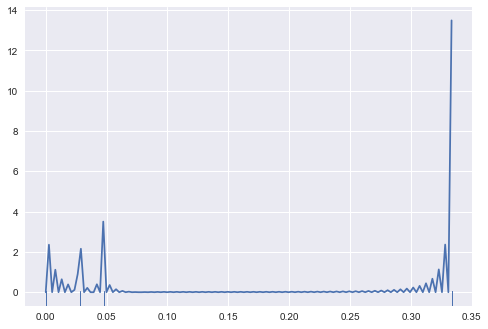

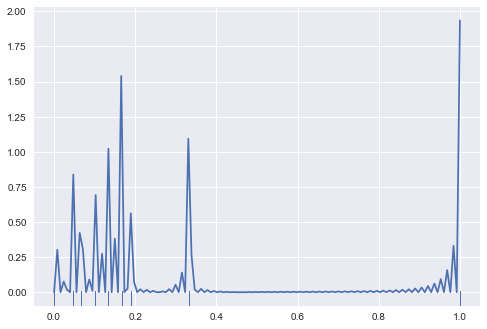

In [46]:
sns.distplot(super_clustering_score, hist = False, rug = True);
plt.show()

sns.distplot(normal_clustering_score, hist = False, rug = True);
plt.show()

In [24]:
# exploring pgrank

training_vectors_mix = []
test_vectors_mix = []

training_indices = []
test_indices = []


x = np.asarray(tmp_vectors)
y = np.asarray(isreplied)

for index in range(data_length):
    
    oneid = ids[index]
    origin_list = x[index].tolist()
    starter = starter_dic[oneid]
    forum_id = thread_forum_dic[oneid]
    g = forum_digraph_dic[forum_id]
    user = starter_dic[oneid]
    time = thread_posted_time_dic[oneid]
    intervened = is_replied[oneid]
    pgrank = get_chronological_pgrank(time, g, user)
    
    '''
    if intervened:
        super_clustering_score.append(clu)
    else:
        normal_clustering_score.append(clu)
    origin_list.append(clu)
    '''

    if forum_type_dic[thread_forum_dic[oneid]] <= middleInd:
        training_vectors_mix.append(origin_list)

    else:
        test_vectors_mix.append(origin_list)


LogReg = LogisticRegression(class_weight = 'balanced')
LogReg.fit(training_vectors_mix, training_result)

print(LogReg.coef_)
pred_result_mix = LogReg.predict(test_vectors_mix)
with open('EDM.txt', 'w') as f:
    print(classification_report(test_result, pred_result_mix), file = f)
print(classification_report(test_result, pred_result_mix))



[[-0.02091583 -0.02658977 -0.03983184 ...,  0.01638936 -0.0427159
  -1.29993875]]
             precision    recall  f1-score   support

          0       0.83      0.63      0.72       119
          1       0.44      0.69      0.54        49

avg / total       0.72      0.65      0.66       168



In [87]:
training_vectors_mix = []
test_vectors_mix = []

training_vectors_cen = []
test_vectors_cen = []

training_indices = []
test_indices = []



for index in range(data_length):
    li = []
    oneid = ids[index]
    origin_list = x[index].tolist()
    starter = starter_dic[oneid]
    forum_id = thread_forum_dic[oneid]
    forum_index = forum_type_dic[forum_id]
    for i in range(0, 4):
        current_forum_index = forum_index - i
        if current_forum_index <= 0:
            li.append(0)
            li.append(0)
            continue
        else:
            g = forum_graph_dic[forum_id_list[current_forum_index]]
            cent = nx.degree_centrality(g)
            clu = nx.clustering(g)
            #modified
            if starter in cent:
                li.append(cent[starter])
                li.append(clu[starter])
            else:
                li.append(0)
                li.append(0)


    print(li)
    new_list = origin_list + li

    if forum_type_dic[thread_forum_dic[oneid]] <= middleInd:
        training_vectors_mix.append(new_list)
        training_vectors_cen.append(li)

    else:
        test_vectors_mix.append(new_list)
        test_vectors_cen.append(li)



#x = np.asarray(latest_vectors)      
y = np.asarray(isreplied)

'''
kf = KFold(data_length, n_folds = 5, shuffle=False, random_state = 18)
print(kf)
for train_index, test_index in kf:
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
'''  
LogReg = LogisticRegression(class_weight = 'balanced')
LogReg.fit(training_vectors_cen, training_result)
pred_result_cen = LogReg.predict(test_vectors_cen)
with open('EDM.txt', 'w') as f:
    print(classification_report(test_result, pred_result_cen), file = f)
print(classification_report(test_result, pred_result_cen))



LogReg = LogisticRegression(class_weight = 'balanced')
LogReg.fit(training_vectors_mix, training_result)
pred_result_mix = LogReg.predict(test_vectors_mix)
with open('EDM.txt', 'w') as f:
    print(classification_report(test_result, pred_result_mix), file = f)
print(classification_report(test_result, pred_result_mix))



[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.02071005917159763, 0.0, 0, 0, 0.019774011299435026, 0.14285714285714285, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.005649717514124294, 0.0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.022598870056497175, 0.07142857142857142, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.01694915254237288, 0.06666666666666667, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.03389830508474576, 0.06060606060606061, 0, 0, 0, 0, 0, 0]
[0.019774011299435026, 0.14285714285714285, 0, 0, 0, 0, 0, 0]
[0.04519774011299435, 0.05, 0, 0, 0, 0, 0, 0]
[0.00

[0.005917159763313609, 0.0, 0, 0, 0.002824858757062147, 0.0, 0, 0]
[0.00847457627118644, 0.0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0.0041841004184100415, 0.0, 0.031073446327683614, 0.16363636363636364, 0, 0]
[0.0790960451977401, 0.03439153439153439, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0.0041841004184100415, 0.0, 0.031073446327683614, 0.16363636363636364, 0, 0]
[0.005649717514124294, 0.0, 0, 0, 0, 0, 0, 0]
[0.005649717514124294, 0.0, 0, 0, 0, 0, 0, 0]
[0.0041841004184100415, 0.0, 0.011299435028248588, 0.5, 0, 0, 0, 0]
[0.0790960451977401, 0.03439153439153439, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.03347280334728033, 0.03571428571428571, 0.005649717514124294, 0.0, 0, 0, 0, 0]
[0.00847457627118644, 0.0, 0, 0, 0, 0, 0, 0]
[0.03347280334728033, 0.03571428571428571, 0.005649717514124294, 0.0, 0, 0, 0, 0]
[0.002824858757062147, 0.0, 0, 0, 0, 0, 0, 0]
[0.011299435028248588, 0.0, 0, 0, 0, 0, 0, 0]
[0.012552301255230124, 0.3333333333333333, 0, 0, 0, 0, 0, 0]
[0.

[0.005649717514124294, 0.0, 0, 0, 0, 0, 0, 0]
[0.005649717514124294, 0.0, 0, 0, 0, 0, 0, 0]
[0.005649717514124294, 0.0, 0, 0, 0, 0, 0, 0]
[0.002824858757062147, 0.0, 0, 0, 0, 0, 0, 0]
[0.00847457627118644, 0.3333333333333333, 0, 0, 0, 0, 0, 0]
[0.0029585798816568047, 0.0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.05325443786982249, 0.0196078431372549, 0.04184100418410042, 0.0, 0.0790960451977401, 0.03439153439153439, 0, 0]
[0.002824858757062147, 0.0, 0, 0, 0, 0, 0, 0]
[0.011299435028248588, 0.0, 0, 0, 0, 0, 0, 0]
[0.002824858757062147, 0.0, 0, 0, 0, 0, 0, 0]
[0.014124293785310734, 0.2, 0, 0, 0, 0, 0, 0]
[0.002824858757062147, 0.0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.02824858757062147, 0.044444444444444446, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.023668639053254437, 0.10714285714285714, 0.02928870292887029, 0.09523809523809523, 0.002824858757062147, 0.0, 0, 0]
[0.00847457627118644, 0.0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.002824858757062147, 0.0, 0, 0, 0, 0

[0.011834319526627219, 0.0, 0.0041841004184100415, 0.0, 0.005649717514124294, 0.0, 0, 0]
[0.04437869822485207, 0.05714285714285714, 0, 0, 0.005649717514124294, 0.0, 0, 0]
[0.0029585798816568047, 0.0, 0, 0, 0, 0, 0, 0]
[0.008875739644970414, 0.0, 0, 0, 0, 0, 0, 0]
[0.011834319526627219, 0.16666666666666666, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0.005649717514124294, 0.0, 0, 0]
[0, 0, 0, 0, 0.002824858757062147, 0.0, 0, 0]
[0.02928870292887029, 0.047619047619047616, 0.005649717514124294, 0.0, 0, 0, 0, 0]
[0.023668639053254437, 0.07142857142857142, 0.02928870292887029, 0.047619047619047616, 0.005649717514124294, 0.0, 0, 0]
[0.008875739644970414, 0.0, 0.0041841004184100415, 0.0, 0.002824858757062147, 0.0, 0, 0]
[0.002824858757062147, 0.0, 0, 0, 0, 0, 0, 0]
[0.014792899408284023, 0.2, 0.008368200836820083, 0.0, 0.005649717514124294, 0.0, 0, 0]
[0.014792899408284023, 0.2, 0.008368200836820083, 0.0, 0.005649717514124294, 0.0, 0, 0]
[0.014792899408284023, 0.2, 0.008368200836820083, 0.0, 0.00564971751

[0.008875739644970414, 0.0, 0, 0, 0, 0, 0, 0]
[0.008368200836820083, 0.0, 0.002824858757062147, 0.0, 0, 0, 0, 0]
[0.005917159763313609, 0.0, 0, 0, 0, 0, 0, 0]
[0.011834319526627219, 0.0, 0, 0, 0, 0, 0, 0]
[0, 0, 0.03765690376569037, 0.027777777777777776, 0.002824858757062147, 0.0, 0, 0]
[0.023668639053254437, 0.0, 0, 0, 0.002824858757062147, 0.0, 0, 0]
[0, 0, 0.002824858757062147, 0.0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.005917159763313609, 0.0, 0.008368200836820083, 0.0, 0.002824858757062147, 0.0, 0, 0]
[0.0029585798816568047, 0.0, 0.008368200836820083, 0.0, 0, 0, 0, 0]
[0.005917159763313609, 0.0, 0, 0, 0.04519774011299435, 0.08333333333333333, 0, 0]
[0.008875739644970414, 0.0, 0.008368200836820083, 1.0, 0, 0, 0, 0]
[0.005917159763313609, 0.0, 0.008368200836820083, 0.0, 0.002824858757062147, 0.0, 0, 0]
[0.008875739644970414, 0.0, 0.008368200836820083, 1.0, 0, 0, 0, 0]
[0.04437869822485207, 0.05714285714285714, 0.008368200836820083, 0.0, 0.01412429378531073

In [57]:
print(LogReg.coef_)

[[ 0.13889355 -0.083231   -0.03194887 ...,  0.          0.          0.        ]]


In [37]:
import operator

user_cent_sum_dic = {}
for forum_id in forum_graph_dic:
    cent = nx.degree_centrality(forum_graph_dic[forum_id])
    for user in cent:
        if user in user_table and user_table[user] != 'Student':
            continue
            
        if user not in user_cent_sum_dic:
            user_cent_sum_dic[user] = 0
        user_cent_sum_dic[user] += cent[user]
 
user_cent_sum_dic = sorted(user_cent_sum_dic.items(), key=operator.itemgetter(1))
good_student_dic = {}
for tup in user_cent_sum_dic:
    if tup[1] > 0.05:
        good_student_dic[tup[0]] = tup[1]

print(good_student_dic)

{9400121: 0.05002841573897636, 3637530: 0.05029585798816568, 124313: 0.050345234093795294, 541944: 0.05067174870921526, 3677: 0.05091847698037227, 5534303: 0.0541665295266197, 13296001: 0.0546357099465717, 6935156: 0.05578220073918687, 11814913: 0.056224724808254786, 14925104: 0.057416267942583726, 5146477: 0.06220095693779904, 5781489: 0.06339174849146433, 8963841: 0.06440520749882908, 11822375: 0.06461726902821757, 15597251: 0.06472733610901375, 6206340: 0.06546896686195389, 15052810: 0.06687119284698288, 15731817: 0.07251127634182558, 3868043: 0.07309253463874824, 5621541: 0.0736970547922308, 15199263: 0.07828508096126294, 151006: 0.08952844593036649, 7470685: 0.09290358788901258, 3853969: 0.09725469749509735, 4404: 0.10377982912807587, 4375186: 0.10781750985420463, 15662154: 0.11940140946324501, 13157464: 0.1301775147928994, 14893116: 0.19333024323252423, 11069561: 0.23441599886532868}


Now we try to run the code again but with extra truncation

In [85]:
# demographics of all threads
course_name_set = set()
course_id_set = set()
course_num_weeks_dic = {}
course_num_threads_dic = {}
course_num_posts_dic = {}
course_num_comments_dic = {}
course_num_pos_threads_dic = {}
course_num_neg_threads_dic = {}



conn = util.create_connection(database)
with conn:
    cur = conn.cursor()
    forum_message = 'select id, forumname, courseid, coursename, numthreads from forum'
    cur.execute(forum_message)
    forums = cur.fetchall()
    for each_forum in forums:
        
        # All the info from this select operation
        forum_id = each_forum[0]
        forum_name = each_forum[1]
        course_id = each_forum[2]
        course_name = each_forum[3]
        num_threads = each_forum[4]
        course_name_set.add(course_name)
        course_id_set.add(course_id)
        if course_name not in course_num_threads_dic:
            
            course_num_weeks_dic[course_name] = 0
            course_num_threads_dic[course_name] = 0
            course_num_neg_threads_dic[course_name] = 0
            course_num_pos_threads_dic[course_name] = 0
            course_num_posts_dic[course_name] = 0
            course_num_comments_dic[course_name] = 0
        
        if 'Week' in forum_name:
            
            course_num_weeks_dic[course_name] += 1
            course_num_threads_dic[course_name] += num_threads
            thread_message = 'select inst_replied from thread where forumid == \''
            thread_message += forum_id
            thread_message += '\''
            cur.execute(thread_message)
            firsts = cur.fetchall()
            for inst in firsts:
                if inst[0] == 1:
                    course_num_pos_threads_dic[course_name] += 1
                else:
                    course_num_neg_threads_dic[course_name] += 1

            post_message = 'select * from post where forumid == \''
            post_message += forum_id
            post_message += '\''
            cur.execute(post_message)
            seconds = cur.fetchall()
            course_num_posts_dic[course_name] += len(seconds)
            
            comment_message = 'select * from comment where forumid == \''
            comment_message += forum_id
            comment_message += '\''
            cur.execute(comment_message)
            thirds = cur.fetchall()
            course_num_comments_dic[course_name] += len(thirds)


        
course_num_threads_dic = sorted(course_num_threads_dic.items(), key=operator.itemgetter(1))



In [86]:
course_column = []
week_column = []
thread_column = []
pos_column = []
neg_column = []
post_column = []
comment_column = []
ratio_column = []

for tup in course_num_threads_dic:
    print(tup[0] + '; num of threads: ' + str(tup[1]) + '; num of pos: ' + str(course_num_pos_threads_dic[tup[0]]) + '; num of neg: ' + str(course_num_neg_threads_dic[tup[0]]) + '; num of posts: ' + str(course_num_posts_dic[tup[0]]))
    course_column.append(tup[0])
    week_column.append(course_num_weeks_dic[tup[0]])
    thread_column.append(tup[1])
    pos_column.append(course_num_pos_threads_dic[tup[0]])
    neg_column.append(course_num_neg_threads_dic[tup[0]])
    post_column.append(course_num_posts_dic[tup[0]])
    comment_column.append(course_num_comments_dic[tup[0]])
    if course_num_neg_threads_dic[tup[0]] == 0:
        ratio_column.append('N')
    else:
        ratio_column.append(float(course_num_pos_threads_dic[tup[0]]) / course_num_neg_threads_dic[tup[0]])

wharton-operations-analytics; num of threads: 0; num of pos: 0; num of neg: 0; num of posts: 0
corporate-entrepreneurs-opportunity; num of threads: 1; num of pos: 0; num of neg: 1; num of posts: 2
motion-and-kinetics; num of threads: 1; num of pos: 1; num of neg: 0; num of posts: 6
wharton-people-analytics; num of threads: 1; num of pos: 0; num of neg: 1; num of posts: 1
cloud-applications-part1; num of threads: 2; num of pos: 0; num of neg: 2; num of posts: 36
accounting-analytics; num of threads: 3; num of pos: 1; num of neg: 2; num of posts: 6
competitive-strategy; num of threads: 3; num of pos: 3; num of neg: 0; num of posts: 6
photography-techniques; num of threads: 3; num of pos: 0; num of neg: 3; num of posts: 15
text-mining; num of threads: 3; num of pos: 2; num of neg: 1; num of posts: 7
typography; num of threads: 3; num of pos: 0; num of neg: 3; num of posts: 5
weight-loss-plan; num of threads: 3; num of pos: 0; num of neg: 3; num of posts: 271
how-to-write-a-resume; num of 

In [87]:
data_dic = {}

data_dic['course'] = course_column
data_dic['week'] = week_column
data_dic['threads'] = thread_column
data_dic['pos_threads'] = pos_column
data_dic['neg_threads'] = neg_column
data_dic['ratio'] = ratio_column
data_dic['posts'] = post_column
data_dic['comments'] = comment_column


df = DataFrame(data_dic)
writer = pd.ExcelWriter('demographical_data.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()


bower does not work

<co-content><text>Hi Guys,</text><text>I'm trying to install angular route ( I'm working on windows ), but when I type in 'bower install....' then I get the error message "bower is not recognised as an internal or external command, operable program or batch file". Even when I type in the full path to where bower is, I get the same message.</text><text>Does anyone know what is going on?</text><text>Thankx!</text><text>Niki</text></co-content>

<co-content><text>You have probably have not installed bower globally</text><text>Try to open cmd and type: <strong>npm install -g bower </strong></text><text>Make sure you are running the command at the location that bower.json lives / presents.</text></co-content>

<co-content><text>yup, that did the trick.</text><text/><text>Thank you!</text></co-content>

